In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_json("ckh1.json" , lines  = True)

In [3]:
data.columns

Index(['_host', 'ad_network_id', 'ad_type', 'adlog_count', 'advertiser_id',
       'bid_requests', 'bid_responses', 'c_cnt', 'c_flag_cnt', 'c_timestamp',
       'c_txn_fee', 'c_txn_rate', 'campaign_id', 'campaign_type', 'ck',
       'cr_cnt', 'creative_id', 'exp_mode', 'f_cnt', 'flag', 'geo_area_code',
       'geo_city_code', 'geo_city_name', 'geo_continent_code',
       'geo_country_code2', 'geo_country_code3', 'geo_dma_code',
       'geo_postal_code', 'geo_region_name', 'geo_timezone', 'i_cnt',
       'i_flag_cnt', 'i_timestamp', 'i_txn_fee', 'i_txn_rate', 'ip_address',
       'is_bot', 'is_fraud', 'keywords', 'num_ads', 'preview',
       'pub_campaign_id', 'pub_network_id', 'r_cnt', 'r_num_ads_requested',
       'r_num_ads_returned', 'r_num_ads_third_party', 'r_timestamp',
       'rate_metric', 'referer', 'session_id', 'site_id', 'token', 'txn_fee',
       'txn_rate', 'ua', 'ua_device', 'ua_device_type', 'ua_major', 'ua_minor',
       'ua_name', 'ua_os', 'ua_os_name', 'url', 'user_a

In [4]:
def cleanSeries(x):
    return x[~x.isnull()]

In [19]:
cities = data.geo_city_name.value_counts()[:10]

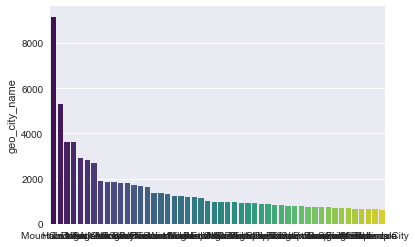

In [21]:
sns.barplot(x=cities.index , y=cities , palette="viridis" )

USA 122
CAN 6
AUS 5
GBR 5
PHL 0
JPN 0
SGP 2
NZL 1
IND 0
CHN 0
DEU 0
MYS 0
MEX 1
BRA 1
IDN 0
HKG 0
FRA 0
THA 1
IRL 2
NLD 0
[122, 6, 5, 5, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0]


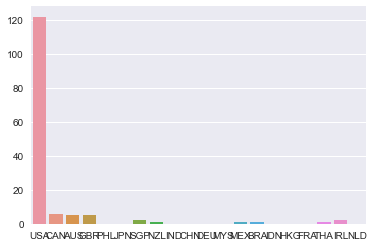

In [35]:
countries = data.geo_country_code3.value_counts()[:20]
count = []
for c in countries.index:
    co = data[data["geo_country_code3"] == c]
    coc = co[co["c_cnt"] == 1]
    count.append(len(coc))
    print(c , len(coc))
    
sns.barplot( x =countries.index , y=pd.Series(count) )

print(count)
    
    

In [11]:
data.is_bot

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
          ..
298117   NaN
298118   NaN
298119   NaN
298120   NaN
298121   NaN
298122   NaN
298123   NaN
298124   NaN
298125   NaN
298126   NaN
298127   NaN
298128   NaN
298129   NaN
298130   NaN
298131   NaN
298132   NaN
298133   NaN
298134   NaN
298135   NaN
298136   NaN
298137   NaN
298138   NaN
298139   NaN
298140   NaN
298141   NaN
298142   NaN
298143   NaN
298144   NaN
298145   NaN
298146   NaN
Name: is_bot, Length: 298147, dtype: float64

In [12]:
cleaned = data[~data["is_bot"].isnull()]

In [31]:
data.c_cnt.value_counts()

0.0    243103
1.0       153
Name: c_cnt, dtype: int64

In [38]:
cli = len(cleaned) / len(data)

In [26]:
clicks =data.c_cnt.value_counts()

In [40]:
data.is_fraud.value_counts()

False    298067
True         80
Name: is_fraud, dtype: int64

In [74]:
arr = pd.Series([clicks[1] / len(data) ,  new_rat , new_ratfr ])

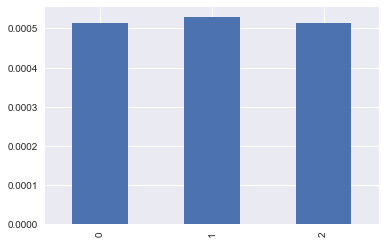

In [75]:
arr.plot(kind='bar')

In [65]:
nobot = data[data["is_bot"].isnull()]

In [45]:
nobotrat = len(nobot) / len(data)

In [47]:
nobotc = nobot[nobot["c_cnt"] == 1]

In [51]:
new_rat= len(nobotc) / len(nobot)

In [56]:
len(nobotc)

153

In [69]:
nofr = data[data["is_fraud"] == False]

In [70]:
nofrat = len(nofr) / len(data)

In [71]:
nofrc = nofr[nofr["c_cnt"] == 1]

In [72]:
new_ratfr= len(nofrc) / len(nofr)

In [73]:
new_ratfr

0.0005133074107499321

In [23]:
vals = data.uuid.value_counts()

In [24]:
vals = vals[:5000]


In [25]:
name_clicks2 = []
for name in vals.index:
    one = data[data["uuid"] == name]
    
    onec = one[one["c_cnt"] == 1]
    if(len(onec)):
        name_clicks2.append(len(onec))
    
    
    

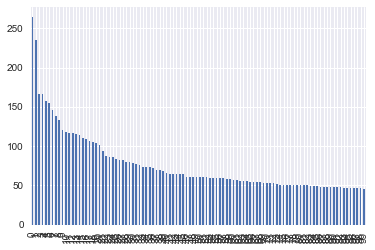

In [15]:
name_clicks = pd.Series(name_clicks)
pd.Series(list(vals)).plot("bar")


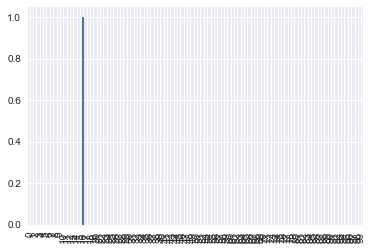

In [16]:
name_clicks.plot("bar")

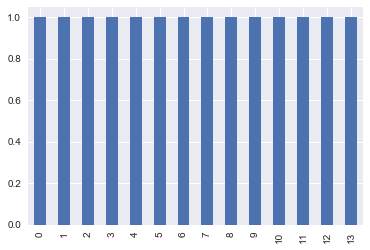

In [32]:
pd.Series(name_clicks2).plot("bar")

In [33]:
percent = []
percentc = []
i = 0
total = 0
totalc = 0
for name in vals.index:
    i+=1
    one = data[data["uuid"] == name]
    total += len(one)
    onec = one[one["c_cnt"] == 1]
    totalc += len(onec)
    if(i % 100 == 0):
        percent.append(total / len(data))
        percentc.append(totalc / clicks[1])
    
    
    

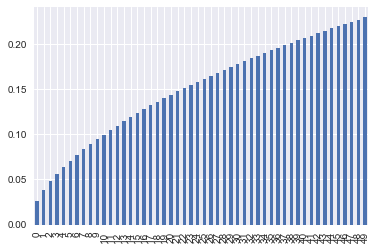

In [34]:
pd.Series(percent).plot("bar")

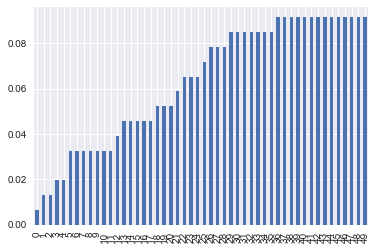

In [35]:
pd.Series(percentc).plot("bar")

In [39]:
vals[vals.index[4999]]

7

0.0001

In [45]:
bots = data[~data["is_bot"].isnull()]

In [49]:
bots.uuid.value_counts()

1ae73b9c-78db-4f6b-95c9-9a7839877fbd    253
4186b65a-f1a5-4767-8612-0016b0053b3c      5
49ae56be-04d9-4f5d-b428-55be785d9b5a      5
ca5ff0cf-6766-45bd-b00d-9c2c77f5a989      4
dcb8dbbd-02e7-40ce-b13d-c04e1bc5845c      4
ec72b5f6-356a-4181-91c1-9b36b76a3959      4
04fbe52b-5704-4bac-af52-9c79cf760d6c      3
742a0326-2866-4edb-933c-aa0b98c7e63b      3
f8b3f7db-f59f-4f49-9344-a84ee4db7e64      3
a0f88381-1eba-4fb6-9da2-151b1b36242e      3
3e5fba3b-05cf-40be-8167-10bedd21483f      3
63f38de6-1415-45cf-86e6-dbb457c82cca      3
252fefb6-abc6-4ca4-b3e5-f5ae3f2f1589      3
7db4e7dd-22fc-4632-a4eb-d6673158df62      3
d7f12357-74c9-4370-979e-bdcb4ee3d6e3      3
34cfc65a-98d1-4bc5-b345-414c7165f42b      3
ba3d86cf-479f-4371-9600-89ccb052da45      3
459f3aca-1ed3-45ed-b7be-d06dd16c34e0      3
c1a0ffb2-c39b-4ade-909e-a281b7ab8d61      3
e3b9de37-b147-44f7-9748-0fe0407985e0      3
c9f1ded9-76d4-4c01-9380-381d69313e71      3
4eaa2816-0310-43db-abaf-fef843d0c244      3
94abac1a-8fbb-4132-82f0-c91f7330

In [51]:
data.uuid.value_counts()

1ae73b9c-78db-4f6b-95c9-9a7839877fbd                                264
6fdd9cc1-ccbb-4718-8da3-d5022de3fd7f                                235
1f2g1d01p0gu6A7248Tbz57TiDAcpi0Z554i31V649c2c9g3bs5f7xe4KOIiv5fR    167
eecdf3b6-b935-2ec1-fecf-7aca773ba8b5                                166
570Asg78d993fTK178pr644p5aT6d46648dx1aIdh3n531A75615fc57j8bvC477    157
20Vd8p49T7eWMgeDD8A2d4bA82gbT15b01fTc6C96eh42cd9265bsl3aA0lflb40    155
399747a3-87e4-06d4-2e8c-92263142a6d7                                146
6794fc00-cef1-8bde-9ea1-f3261f177a2c                                139
9fYT5A21gf2bOp68c3dsQ1edf8p5gb91617g40X4a2K3f0If344aMz78WI6EY7c2    133
38bp7T56A13b7d1aoDg46c1gb9d7A4a144at3eBz13HmR2Zmn5a56Q58EfhVK61b    120
7cd08098-296a-e3ee-3988-2ba6cc12dbae                                118
c7ed0p0VTemI6gc1c4A43b2A7dgTT6c55fnP36U62bu7f8B2aX6bTry3a4fTHdt4    117
f71d4p9cT167bg9888A7936Abzg5Tb84d22K28c574uFu3h94886eJd1a8bkj9c2    117
60f1dd16-be38-4ebc-b4be-e2f1b9712e8a                            

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X,Y)


In [26]:
rfc = RandomForestClassifier().fit(x_train ,y_train )

In [27]:
accuracy_score(rfc.predict(x_test) , y_test)

0.9995199784950366

In [28]:
rfc2 = RandomForestClassifier()

In [33]:
scores = cross_val_score(rfc, X, Y, cv=5)

In [34]:
np.average(scores)

0.99949116996937948

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

In [39]:
clf_2 = LogisticRegression().fit(X, Y)

In [50]:
prob_y_2 = clf_2.predict_proba(X)

In [51]:
prob_y_2 = [p[1] for p in prob_y_2]

In [52]:
print( roc_auc_score(Y, prob_y_2) )

0.837361734673


In [53]:
rfc3 = RandomForestClassifier().fit(X ,Y )

In [54]:
prob_y_3 = rfc3.predict_proba(X)

In [55]:
prob_y_3 = [p[1] for p in prob_y_3]

In [57]:
print(roc_auc_score(Y, prob_y_3) )

0.882535378208


In [62]:
clicks = cleaned[cleaned["c_cnt"] == 1]
non_clicks = cleaned[cleaned["c_cnt"] == 0]

In [76]:
click_upsample = resample(clicks, 
                                 replace=True,     # sample with replacement
                                 n_samples=208000,    # to match majority class
                                 random_state=123) # reproducible results

In [77]:
len(click_upsample["c_cnt"])

208000

In [78]:
df_upsampled = pd.concat([non_clicks, click_upsample])

In [79]:
df_upsampled["c_cnt"].value_counts()

0.0    208215
1.0    208000
Name: c_cnt, dtype: int64

In [80]:
xup = df_upsampled[["ad_network_id"  , "advertiser_id" , "zone_id"]]

In [81]:
yup = df_upsampled["c_cnt"]

In [84]:
clf_2 = LogisticRegression()

In [90]:
scoresup = cross_val_score(LogisticRegression(), xup, yup, cv=5)

In [91]:
scoresup

array([ 0.76652692,  0.76879738,  0.76861718,  0.76941004,  0.76858114])

In [88]:
scoresup2 = cross_val_score(RandomForestClassifier(), xup, yup, cv=5)

In [94]:
scoresup2

array([ 0.82665209,  0.8297034 ,  0.82876638,  0.83032808,  0.82985957])

In [93]:
from sklearn.decomposition import PCA

In [98]:
pca = PCA(n_components=2)

In [203]:
use = df_upsampled.dropna(axis=1)
use

,ad_network_id,ad_type,advertiser_id,bid_requests,bid_responses,c_cnt,campaign_id,campaign_type,cr_cnt,creative_id,...,rate_metric,session_id,site_id,token,ua_device,ua_name,ua_os_name,vi_cnt,vv_cnt,zone_id
0,1839,[story],4523,[],[],0.0,26027,private,1,4649883,...,CPC,b67ffe777f3543578d1e3d20896aca40_4382919b,13042,3JZVS8LT,Samsung SM-G930V,Chrome Mobile,Android,0.0,0.0,26024
2,1828,[story],4514,[],[],0.0,22360,private,1,1814135,...,CPC,990417c9971e4f3ba144d44170a66cbb_88600994,12760,8JQG8ZMJ,QTAIR7,Chrome,Android,0.0,0.0,17681
3,1839,[story],4523,[],[],0.0,26027,private,1,4649883,...,CPC,1db38cb811f14db0889f8e838028040b_f4e93821,13042,3JZVS8LT,iPhone,Mobile Safari,iOS,0.0,0.0,26024
5,1581,[story],5140,[],[],0.0,25969,private,1,4509292,...,CPC,27340bd73f9942449a0a7514e13cf6fe_1efb3904,13042,XE5E0S7N,iPad,Mobile Safari,iOS,0.0,0.0,26024
7,1839,[story],4523,[],[],0.0,26027,private,1,4574450,...,CPC,f5ddf7378bf1488185e0522a99d3c5e3_04c7e9d4,13042,XY3MFX1Z,Other,Chrome,Windows 8.1,0.0,0.0,26024
8,1839,[story],4523,[],[],0.0,26027,private,1,4574450,...,CPC,49c7925f40fc43cdb6890d603eee06f2_dbdaeb53,13042,XY3MFX1Z,iPhone,Mobile Safari,iOS,0.0,0.0,26024
9,1839,[story],4523,[],[],0.0,26027,private,1,4649883,...,CPC,b0cb4e30091644f7aed4c8c3474819bb_3c482591,13042,3JZVS8LT,Other,Chrome,Windows 7,0.0,0.0,26024
10,1839,[story],4523,[],[],0.0,26027,private,1,4649882,...,CPC,6bf92a1b3aba411eae9216dd6877c3e9_17c4e6ce,13042,6P8WN27L,Other,IE,Windows 10,0.0,0.0,26024
11,1839,[story],4523,[],[],0.0,26027,private,1,4649883,...,CPC,35d25f976c0e4d158fdc1052847ef501_5335fbf4,13042,3JZVS8LT,XT1585,Chrome Mobile,Android,0.0,0.0,26024
12,1845,[story],5125,[],[],0.0,26124,private,1,4707966,...,CPC,3dc116cee23c4daebd971b57396247fe_fcb0327d,15899,85Z175EL,Samsung SM-N950U,Chrome Mobile,Android,0.0,0.0,21817


In [204]:
count = 0
arr = []
for i in use:
    if(type(use[i].iloc[0]) == type(use["c_cnt"].iloc[0]) or type(use[i].iloc[0]) == type(use["ad_network_id"].iloc[0]) ):
        arr.append(count)
        print(type(use[i].iloc[0]))
    count+= 1

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>


In [205]:
df = use.iloc[:, [0]]
for i in arr:
    df = pd.concat([df , use.iloc[:, [i]]] , axis=1)

In [206]:
dfx = df.drop(["c_cnt"],axis=1)
dfx

,ad_network_id,ad_network_id,advertiser_id,campaign_id,cr_cnt,creative_id,f_cnt,geo_dma_code,i_cnt,pub_network_id,r_cnt,r_num_ads_requested,r_num_ads_returned,r_num_ads_third_party,site_id,vi_cnt,vv_cnt,zone_id
0,1839,1839,4523,26027,1,4649883,0.0,0,1.0,767,1,10,10,0,13042,0.0,0.0,26024
2,1828,1828,4514,22360,1,1814135,0.0,0,1.0,767,1,4,4,0,12760,0.0,0.0,17681
3,1839,1839,4523,26027,1,4649883,0.0,504,1.0,767,1,10,10,0,13042,0.0,0.0,26024
5,1581,1581,5140,25969,1,4509292,0.0,0,1.0,767,1,10,7,0,13042,0.0,0.0,26024
7,1839,1839,4523,26027,1,4574450,0.0,679,1.0,767,1,10,10,0,13042,0.0,0.0,26024
8,1839,1839,4523,26027,1,4574450,0.0,0,1.0,767,1,10,10,0,13042,0.0,0.0,26024
9,1839,1839,4523,26027,1,4649883,0.0,501,1.0,767,1,10,10,0,13042,0.0,0.0,26024
10,1839,1839,4523,26027,1,4649882,0.0,618,1.0,767,1,10,10,0,13042,0.0,0.0,26024
11,1839,1839,4523,26027,1,4649883,0.0,517,1.0,767,1,10,10,0,13042,0.0,0.0,26024
12,1845,1845,5125,26124,1,4707966,0.0,807,1.0,767,1,4,4,0,15899,0.0,0.0,21817


In [207]:
dfy = df["c_cnt"]
dfy

0         0.0
2         0.0
3         0.0
5         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
29        0.0
30        0.0
31        0.0
32        0.0
33        0.0
34        0.0
         ... 
138587    1.0
226540    1.0
58567     1.0
97214     1.0
205584    1.0
189772    1.0
189857    1.0
132607    1.0
11058     1.0
150382    1.0
58567     1.0
57046     1.0
144412    1.0
58567     1.0
189772    1.0
146654    1.0
69410     1.0
47000     1.0
10341     1.0
138587    1.0
37576     1.0
205566    1.0
87534     1.0
129793    1.0
26975     1.0
150382    1.0
53244     1.0
205566    1.0
69410     1.0
32244     1.0
Name: c_cnt, Length: 416215, dtype: float64

In [208]:
pca.fit(dfx)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [209]:
pcax = pca.transform(dfx)

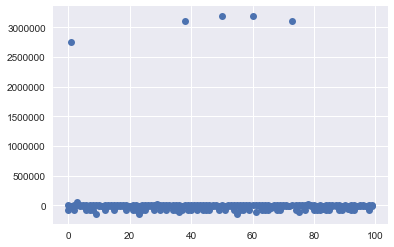

In [210]:
import matplotlib.pyplot as plt
plt.plot(pcax[:100] , 'bo')

In [211]:
mdl = RandomForestClassifier()

In [220]:
scoresup2 = cross_val_score(mdl, dfx, dfy, cv=5)

In [221]:
np.average(scoresup2)

0.97200965846978138

In [214]:
dfy.value_counts()


0.0    208215
1.0    208000
Name: c_cnt, dtype: int64

In [215]:
dfx

,ad_network_id,ad_network_id,advertiser_id,campaign_id,cr_cnt,creative_id,f_cnt,geo_dma_code,i_cnt,pub_network_id,r_cnt,r_num_ads_requested,r_num_ads_returned,r_num_ads_third_party,site_id,vi_cnt,vv_cnt,zone_id
0,1839,1839,4523,26027,1,4649883,0.0,0,1.0,767,1,10,10,0,13042,0.0,0.0,26024
2,1828,1828,4514,22360,1,1814135,0.0,0,1.0,767,1,4,4,0,12760,0.0,0.0,17681
3,1839,1839,4523,26027,1,4649883,0.0,504,1.0,767,1,10,10,0,13042,0.0,0.0,26024
5,1581,1581,5140,25969,1,4509292,0.0,0,1.0,767,1,10,7,0,13042,0.0,0.0,26024
7,1839,1839,4523,26027,1,4574450,0.0,679,1.0,767,1,10,10,0,13042,0.0,0.0,26024
8,1839,1839,4523,26027,1,4574450,0.0,0,1.0,767,1,10,10,0,13042,0.0,0.0,26024
9,1839,1839,4523,26027,1,4649883,0.0,501,1.0,767,1,10,10,0,13042,0.0,0.0,26024
10,1839,1839,4523,26027,1,4649882,0.0,618,1.0,767,1,10,10,0,13042,0.0,0.0,26024
11,1839,1839,4523,26027,1,4649883,0.0,517,1.0,767,1,10,10,0,13042,0.0,0.0,26024
12,1845,1845,5125,26124,1,4707966,0.0,807,1.0,767,1,4,4,0,15899,0.0,0.0,21817


# Now try with up and downscaling?

In [223]:
mid_click = resample(clicks, 
                                 replace=True,     # sample with replacement
                                 n_samples=300,    # to match majority class
                                 random_state=123) # reproducible results

In [224]:
mid_nonclick = resample(non_clicks, 
                                 replace=False,     # sample with replacement
                                 n_samples=300,    # to match majority class
                                 random_state=123) # reproducible results

In [226]:
mid = pd.concat([mid_click, mid_nonclick])

In [227]:
mid = mid.dropna(axis=1)

In [245]:
count = 0
arr = []
for i in mid:
    if(type(mid[i].iloc[0]) == type(mid["c_cnt"].iloc[0]) or type(mid[i].iloc[0]) == type(mid["ad_network_id"].iloc[0]) ):
        arr.append(count)
        print(type(mid[i].iloc[0]))
    count+= 1




In [244]:
df = mid.iloc[:, [0]]
for i in arr:
    df = pd.concat([df , mid.iloc[:, [i]]] , axis=1)

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>


In [246]:
df

,ad_network_id,ad_network_id,advertiser_id,c_cnt,campaign_id,cr_cnt,creative_id,f_cnt,geo_dma_code,i_cnt,pub_network_id,r_cnt,r_num_ads_requested,r_num_ads_returned,r_num_ads_third_party,site_id,vi_cnt,vv_cnt,zone_id
138587,727,727,5063,1.0,26066,1,4622339,0.0,548,1.0,727,1,1,1,0,10481,1.0,0.0,14414
214636,1839,1839,4523,1.0,26027,1,4649882,0.0,613,1.0,767,1,4,4,0,12760,1.0,0.0,17681
228068,727,727,5152,1.0,26038,1,4602196,0.0,0,1.0,727,1,1,1,0,10481,1.0,0.0,14414
234961,977,977,2917,1.0,25990,1,4541092,0.0,504,1.0,767,1,10,10,0,13042,0.0,0.0,26024
32244,727,727,5152,1.0,26038,1,4602194,0.0,0,1.0,727,1,1,1,0,10481,1.0,0.0,14414
180055,1839,1839,4523,1.0,26027,1,4574450,0.0,512,1.0,767,1,10,10,0,13042,0.0,0.0,26024
110867,977,977,2917,1.0,26010,1,4570527,0.0,803,1.0,767,1,10,10,0,13042,0.0,0.0,26024
189857,977,977,2917,1.0,26011,1,4570535,0.0,652,1.0,767,1,10,10,0,13042,0.0,0.0,26024
226540,727,727,5063,1.0,26066,1,4622337,0.0,501,1.0,727,1,1,1,0,10481,1.0,0.0,14414
222833,977,977,2917,1.0,25989,1,4541083,0.0,501,1.0,767,1,10,10,0,13042,0.0,0.0,26024


In [256]:
dfx = df.drop(["c_cnt"],axis=1)
dfx

,ad_network_id,ad_network_id,advertiser_id,campaign_id,cr_cnt,creative_id,f_cnt,geo_dma_code,i_cnt,pub_network_id,r_cnt,r_num_ads_requested,r_num_ads_returned,r_num_ads_third_party,site_id,vi_cnt,vv_cnt,zone_id
138587,727,727,5063,26066,1,4622339,0.0,548,1.0,727,1,1,1,0,10481,1.0,0.0,14414
214636,1839,1839,4523,26027,1,4649882,0.0,613,1.0,767,1,4,4,0,12760,1.0,0.0,17681
228068,727,727,5152,26038,1,4602196,0.0,0,1.0,727,1,1,1,0,10481,1.0,0.0,14414
234961,977,977,2917,25990,1,4541092,0.0,504,1.0,767,1,10,10,0,13042,0.0,0.0,26024
32244,727,727,5152,26038,1,4602194,0.0,0,1.0,727,1,1,1,0,10481,1.0,0.0,14414
180055,1839,1839,4523,26027,1,4574450,0.0,512,1.0,767,1,10,10,0,13042,0.0,0.0,26024
110867,977,977,2917,26010,1,4570527,0.0,803,1.0,767,1,10,10,0,13042,0.0,0.0,26024
189857,977,977,2917,26011,1,4570535,0.0,652,1.0,767,1,10,10,0,13042,0.0,0.0,26024
226540,727,727,5063,26066,1,4622337,0.0,501,1.0,727,1,1,1,0,10481,1.0,0.0,14414
222833,977,977,2917,25989,1,4541083,0.0,501,1.0,767,1,10,10,0,13042,0.0,0.0,26024


In [248]:
dfy = df["c_cnt"]

In [257]:
scoresup2 = cross_val_score(mdl, dfx, dfy, cv=5)

In [259]:
np.average(scoresup2)

0.90166666666666673